In [37]:
# -*- coding: utf-8 -*-
import logging
from pathlib import Path

import pandas as pd
import numpy as np

import cloudpickle
import click

import numpy as np

import matplotlib.pyplot as plt

In [38]:
models = '../models'

In [39]:
model_file = Path(models) / 'logistic_model.pkl'
with open(model_file, 'rb') as fp:
    fitted_model = cloudpickle.load(fp)

In [40]:
grid_results = fitted_model.cv_results_

AttributeError: 'Pipeline' object has no attribute 'cv_results_'

In [25]:
AUC = grid_results['mean_test_AUC']

In [26]:
rates = np.ma.getdata(grid_results['param_clf__optimizer__learning_rate'])
dims = np.ma.getdata(grid_results['param_clf__hidden_layer_dim'])
# b_size = np.ma.getdata(grid_results['param_clf__batch_size'])
# opts = np.ma.getdata(grid_results['param_clf__optimizer'])

In [27]:
rates = np.array(rates, dtype=np.float)

In [28]:
log_rates =np.log(rates)

In [29]:
dims.shape

(12,)

In [30]:
df = pd.DataFrame(np.stack((log_rates, dims, AUC), axis=-1))

In [31]:
df.columns = ['log_rates', 'dims', 'auc']

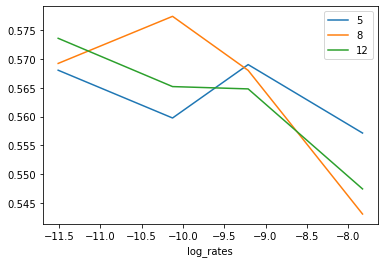

In [32]:
fig, ax2 = plt.subplots(1,1);
df.groupby('dims').plot('log_rates', 'auc', ax=ax2)
plt.legend([v[0] for v in df.groupby('dims')['dims']])

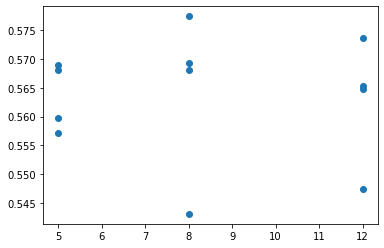

In [33]:
plt.scatter(dims, AUC)

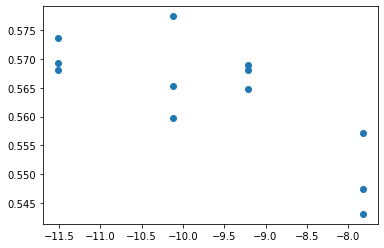

In [34]:
plt.scatter(log_rates, AUC)

In [35]:
plt.scatter(opts, AUC)

NameError: name 'opts' is not defined

In [36]:
print("Best: %f using %s" % (fitted_model.best_score_, 
    fitted_model.best_params_))

Best: 0.577464 using {'clf__hidden_layer_dim': 8, 'clf__optimizer__learning_rate': 4e-05}


In [ ]:
1e-4